In [2]:
#benign vs malignant

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [4]:
#importing the data

In [5]:
data_path = 'data'
contents = os.listdir(data_path)

print("Contents of the 'data' directory:", contents)
print("Number of items in the 'data' directory:", len(contents))

Contents of the 'data' directory: ['test', 'train']
Number of items in the 'data' directory: 2


In [6]:
#reading the data

In [7]:
folder_benign_train = 'data/train/benign'
folder_malignant_train = 'data/train/malignant'

folder_benign_test = 'data/test/benign'
folder_malignant_test = 'data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

In [24]:
# Total count of images in the training dataset
total_train_images = len(X_train)
print("Total number of training images:", total_train_images)

# Total count of images in the testing dataset
total_test_images = len(X_test)
print("Total number of testing images:", total_test_images)

# Total count of images in the entire dataset (train + test)
total_dataset_images = total_train_images + total_test_images
print("Total number of images in the entire dataset:", total_dataset_images)

Total number of training images: 2637
Total number of testing images: 660
Total number of images in the entire dataset: 3297


In [8]:
#displaying the data

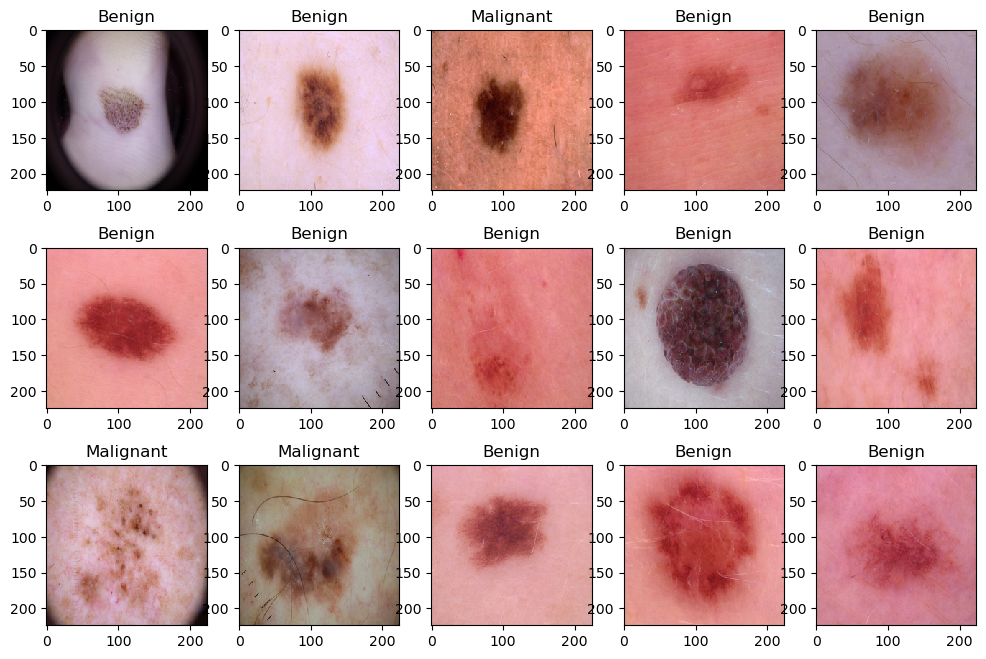

In [9]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [23]:
#dataset

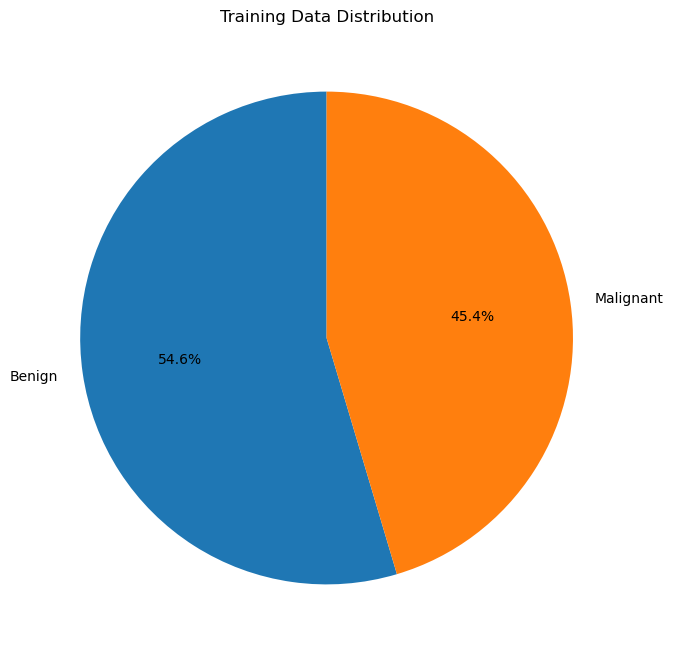

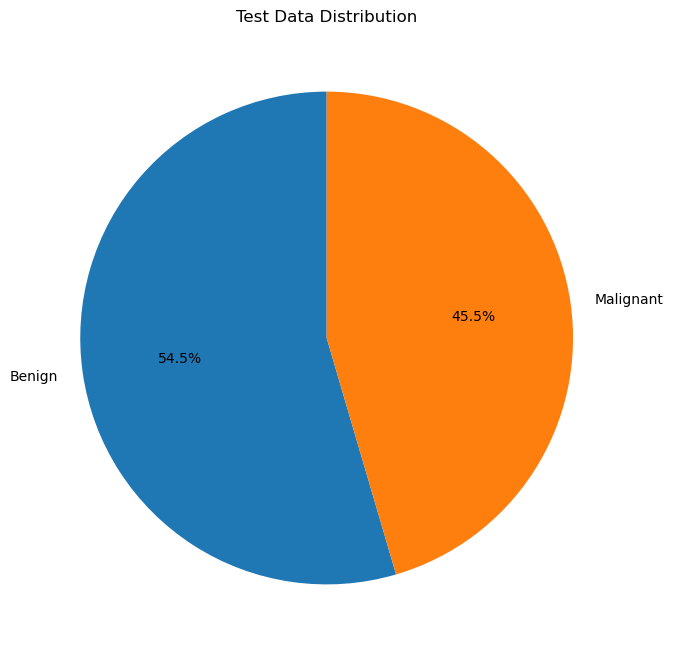

In [22]:
import matplotlib.pyplot as plt

# Training Data
benign_train_count = y_train[np.where(y_train == 0)].shape[0]
malignant_train_count = y_train[np.where(y_train == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([benign_train_count, malignant_train_count], labels=['Benign', 'Malignant'], autopct='%1.1f%%', startangle=90)
plt.title("Training Data Distribution")
plt.show()

# Test Data
benign_test_count = y_test[np.where(y_test == 0)].shape[0]
malignant_test_count = y_test[np.where(y_test == 1)].shape[0]

plt.figure(figsize=(8, 8))
plt.pie([benign_test_count, malignant_test_count], labels=['Benign', 'Malignant'], autopct='%1.1f%%', startangle=90)
plt.title("Test Data Distribution")
plt.show()

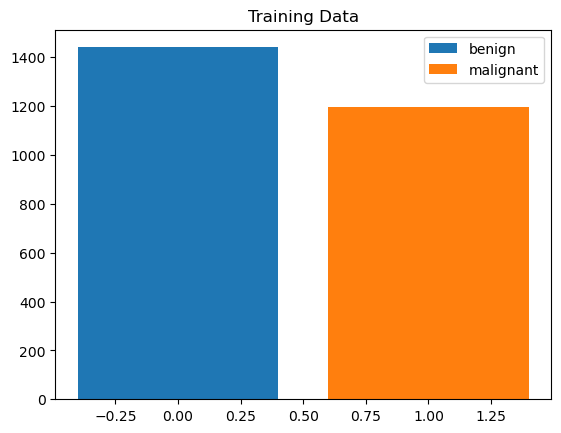

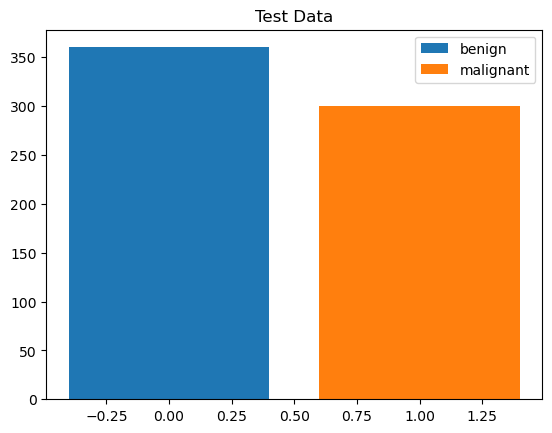

In [11]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [12]:
#score values

In [13]:
X_train = X_train/255.
X_test = X_test/255.

In [26]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Flatten layer
model.add(layers.Flatten(input_shape=(224, 224, 3)))

# Dense layer with ReLU activation and batch normalization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())

# Another Dense layer with ReLU activation and dropout
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())

# Output layer with sigmoid activation (assuming binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [14]:
#traning SVM model

In [16]:
# support vector machine classifier
from sklearn.svm import SVC

model = SVC()

model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [17]:
#testing model-1
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

print(accuracy_score(y_test, y_pred))

0.8348484848484848


In [18]:
# Sample a fraction of the training data
sample_fraction = 0.2  # Adjust this as needed
sample_size = int(X_train.shape[0] * sample_fraction)

X_train_sampled = X_train[:sample_size]
y_train_sampled = y_train[:sample_size]

model.fit(X_train_sampled.reshape(X_train_sampled.shape[0], -1), y_train_sampled)

SVC()

In [19]:
#training another sample model
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality
pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))

model.fit(X_train_pca, y_train)


SVC()

In [20]:
#testing model

In [21]:
from sklearn.metrics import accuracy_score

# Sample a fraction of the testing data
sample_fraction_test = 0.2  # Adjust this as needed
sample_size_test = int(X_test.shape[0] * sample_fraction_test)

X_test_sampled = X_test[:sample_size_test]
y_test_sampled = y_test[:sample_size_test]

# Use PCA to reduce dimensionality for testing data
X_test_pca = pca.transform(X_test_sampled.reshape(X_test_sampled.shape[0], -1))

# Make predictions
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test_sampled, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8560606060606061


Accuracy on Testing Data: 0.8560606060606061
Confusion Matrix for Testing Data:
 [[65 12]
 [ 7 48]]


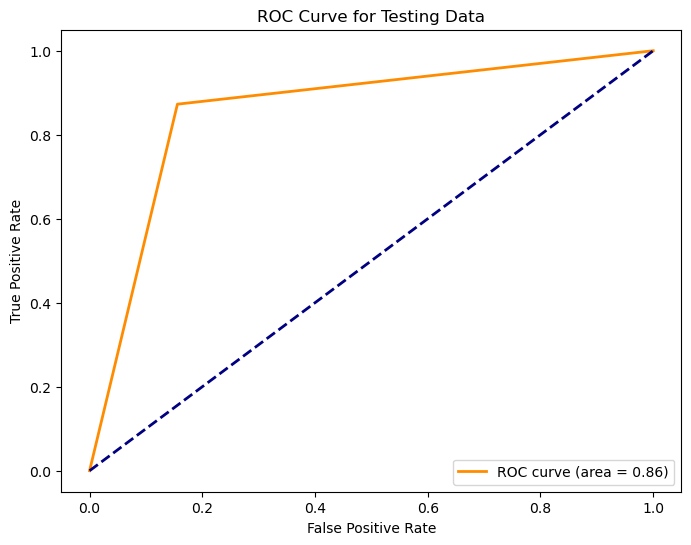

In [35]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy on the sampled testing data
accuracy = accuracy_score(y_test_sampled, y_pred_binary)
print("Accuracy on Testing Data:", accuracy)

# Confusion Matrix for Sampled Testing Data
conf_matrix = confusion_matrix(y_test_sampled, y_pred_binary)
print("Confusion Matrix for Testing Data:\n", conf_matrix)

# ROC Curve for Sampled Testing Data
fpr, tpr, _ = roc_curve(y_test_sampled, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve for Sampled Testing Data
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend(loc="lower right")
plt.show()

Accuracy on Testing Data: 0.8560606060606061
Confusion Matrix for Testing Data:
 [[65 12]
 [ 7 48]]


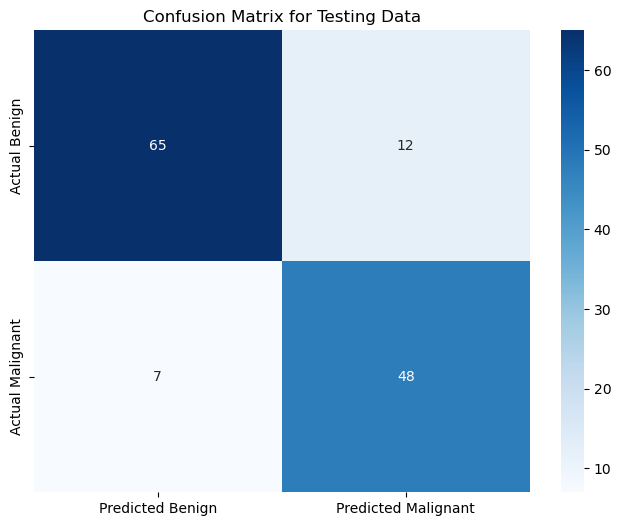

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy on the sampled testing data
accuracy = accuracy_score(y_test_sampled, y_pred_binary)
print("Accuracy on Testing Data:", accuracy)

# Confusion Matrix for Sampled Testing Data
conf_matrix = confusion_matrix(y_test_sampled, y_pred_binary)
print("Confusion Matrix for Testing Data:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title("Confusion Matrix for Testing Data")
plt.show()


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming 'model' is your trained model

# Convert predicted probabilities to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision, and F1 score on the sampled testing data
accuracy = accuracy_score(y_test_sampled, y_pred_binary)
recall = recall_score(y_test_sampled, y_pred_binary)
precision = precision_score(y_test_sampled, y_pred_binary)
f1 = f1_score(y_test_sampled, y_pred_binary)

print("Accuracy on Testing Data:", accuracy)
print("Recall on Testing Data:", recall)
print("Precision on Testing Data:", precision)
print("F1 Score on Testing Data:", f1)

Accuracy on Testing Data: 0.8560606060606061
Recall on Testing Data: 0.8727272727272727
Precision on Testing Data: 0.8
F1 Score on Testing Data: 0.8347826086956521
